### 2. RANDOM SAMPLING

1. The RandomSampleImputer() replaces missing data with a random sample extracted from the variable. It works with both numerical and categorical variables. 

2. Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

3. When should it be used? 

       1. It assumes that the data are missing completely at random(MCAR)
    

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\Harsh Jain\Desktop\HARSH JAIN\3. EVERYTHING RELATED TO DATA\DATA SCIENCE\DATASETS\titanic train.csv",usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
#Take the random sample by dropping the null values:
## Code to create random value in a single feature.

df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [6]:
#Get the index of the values:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [7]:
#Function of random sample to impute missing values.

def impute_nan(df,variable,median):
    df[variable+"_random"]=df[variable]
    
    ##It will have the random sample to fill the nan values.
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [8]:
#Calculate the mdeian and pass it to the function.

median=df.Age.median()
impute_nan(df,"Age",median)

In [9]:
df.head()

,Survived,Age,Fare,Age_random
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

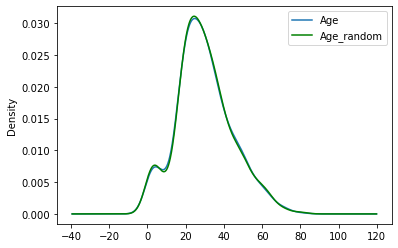

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
#df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#### ADVANTAGES AND DISADVANTAGES:

1. Advantages:
    
    a. Easy To implement
    b. There is less distortion in variance

2. Disadvantage:

    a. Every situation randomness wont work